# 项目：分析鸢尾花种类数据

## 分析目标

此数据分析报告的目的是基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异，让我们可以对不同种类鸢尾花的属性特征进行推断。

## 简介

原始数据`Iris.csv`包括两种鸢尾花，每种有 50 个样本，以及每个样本的一些属性，包括萼片的长度和宽度、花瓣的长度和宽度。

`Iris.csv`每列的含义如下：
- Id：样本的ID。
- SepalLengthCm：萼片的长度（单位为厘米）。
- SepalWidthCm：萼片的宽度（单位为厘米）。
- PetalLengthCm：花瓣的长度（单位为厘米）。
- PetalWidthCm：花瓣的宽度（单位为厘米）。
- Species：鸢尾花种类。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv('Iris.csv')

In [3]:
original_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [4]:
cleaned_data = original_data.copy()

In [7]:
cleaned_data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
22,23,4.6,3.6,1.0,0.2,Iris-setosa
31,32,5.4,3.4,1.5,0.4,Iris-setosa
49,50,5.0,3.3,1.4,0.2,Iris-setosa
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
17,18,5.1,3.5,1.4,0.3,Iris-setosa
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
37,38,4.9,3.1,1.5,0.1,Iris-setosa
20,21,5.4,3.4,1.7,0.2,Iris-setosa
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
40,41,5.0,3.5,1.3,0.3,Iris-setosa


整洁度不存在问题

In [8]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


In [12]:
cleaned_data['Id'] = cleaned_data['Id'].astype('object')
cleaned_data['Species'] = cleaned_data['Species'].astype('category')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             100 non-null    object  
 1   SepalLengthCm  100 non-null    float64 
 2   SepalWidthCm   100 non-null    float64 
 3   PetalLengthCm  100 non-null    float64 
 4   PetalWidthCm   100 non-null    float64 
 5   Species        100 non-null    category
dtypes: category(1), float64(4), object(1)
memory usage: 4.3+ KB


In [13]:
cleaned_data['Id'].duplicated().sum()

0

id里不存在重复值

In [11]:
cleaned_data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64

In [15]:
cleaned_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


并无脱离实际的数值

## 整理数据

因为要分析两种花的各个参数是否有差异，先分离两种花为单个dataframe

In [17]:
Iris_setosa_df = cleaned_data.query('Species == "Iris-setosa"')
len(Iris_setosa_df)

50

In [18]:
Iris_versicolor_df = cleaned_data.query('Species == "Iris-versicolor"')
len(Iris_versicolor_df)

50

In [19]:
Iris_setosa_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
Iris_versicolor_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


### 探索数据

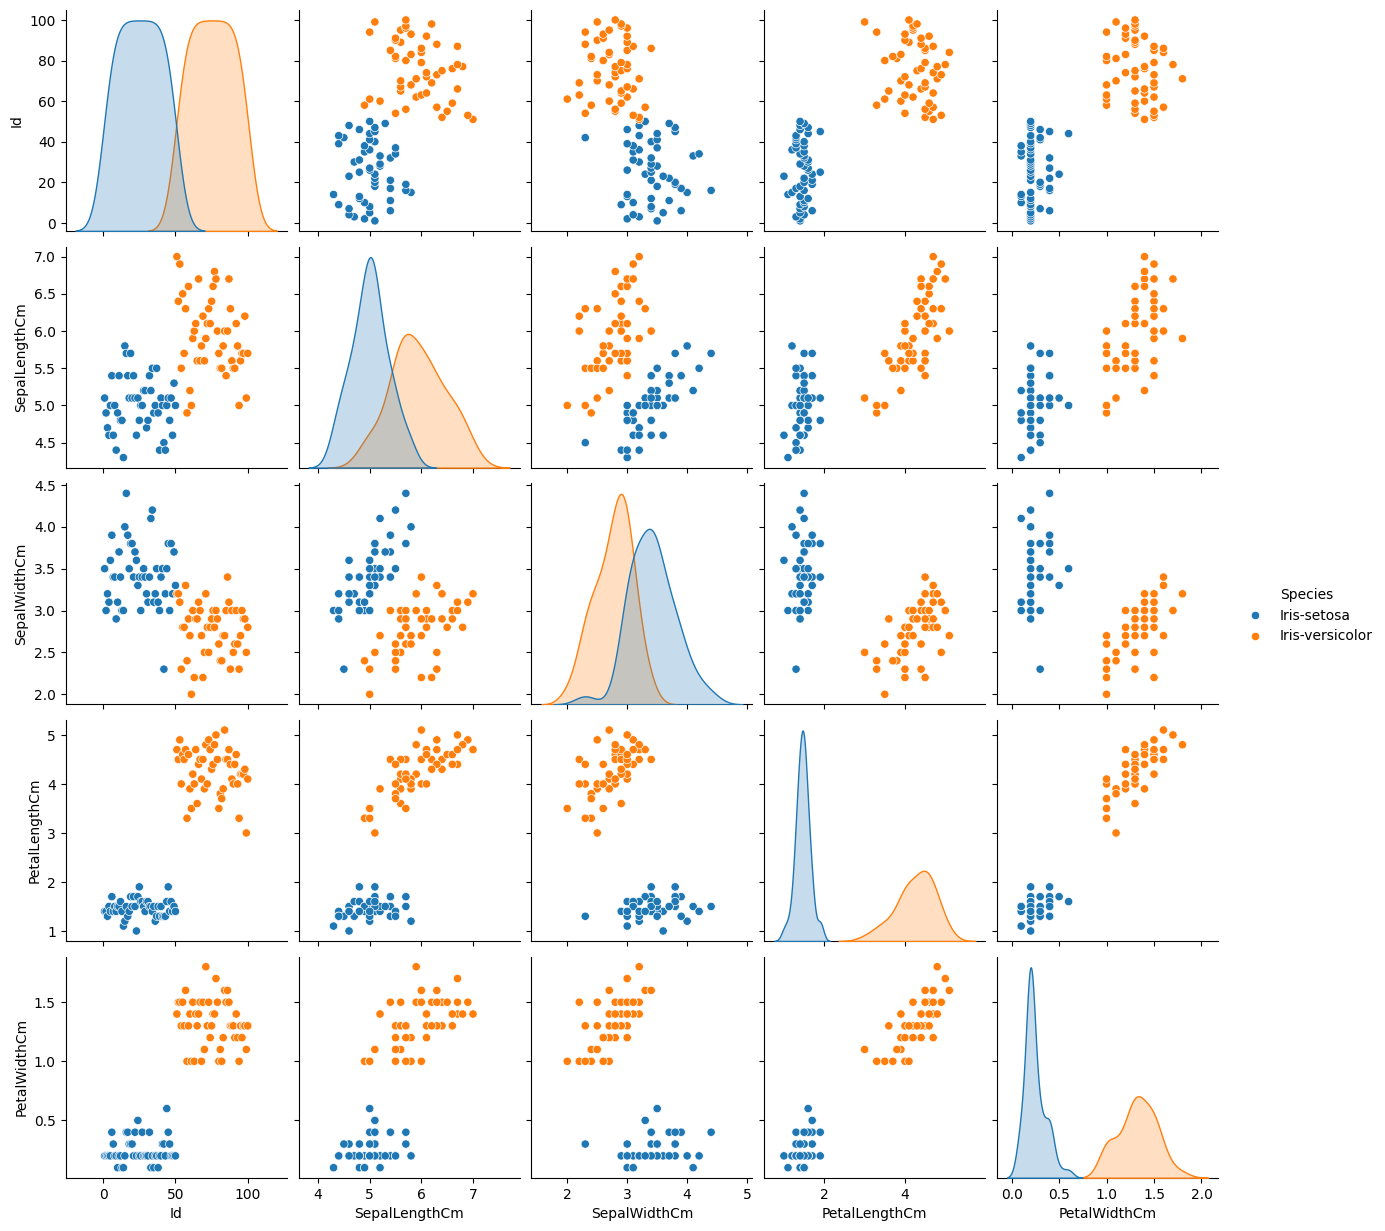

In [25]:
sns.pairplot(cleaned_data,hue = 'Species')
plt.show()

可见萼片长宽从图表中并不能看出显著性差异，但是花瓣的长款有明显的分割线，可以看出有显著性差异

### 分析数据

我们将利用假设检验，依次检验`Setosa`和`Versicolor`这两种鸢尾花在萼片、花瓣的长度和宽度平均值方面，是否存在统计显著性差异。

由于我们只有样本数据，不知道总体的标准差，加上两组样本数各为50，样本数量不大，因此进行t检验，而不是z检验。假设此数据集样本符合t检验的两个前提：样本为随机抽样，总体呈正态分布。

我们先引入t检验所需要的模块。

In [27]:
from scipy.stats import ttest_ind

### 分析萼片长度 
SepalLengthCm

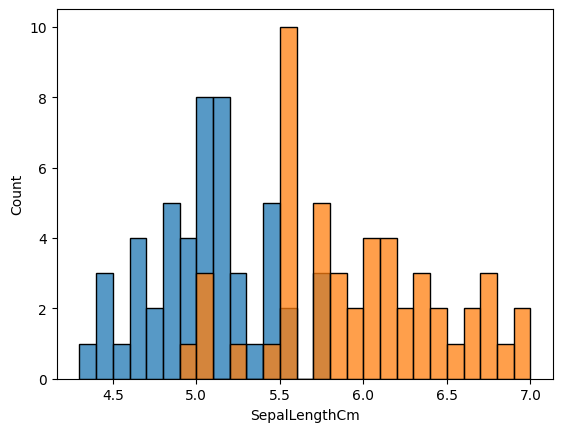

In [28]:
sns.histplot(Iris_setosa_df['SepalLengthCm'],binwidth = 0.1)
sns.histplot(Iris_versicolor_df['SepalLengthCm'],binwidth = 0.1)
plt.show()

#### 建立假设

$H_0$:Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值不存在显著差异

$H_1$:Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值存在显著差异

#### 确定检验是单尾还是双尾

因为只检验是否存在差异，并不在乎谁更长，所以确定是双尾检验。

#### 确定显著水平

双尾一般显著水平为0.05，因此我们也设定为0.05

#### 计算t值和p值



In [30]:
t_stat, p_value = ttest_ind(Iris_setosa_df['SepalLengthCm'],Iris_versicolor_df['SepalLengthCm'])
print(f"t值为:{t_stat}")
print(f"p值为:{p_value}")

t值为:-10.52098626754911
p值为:8.985235037487079e-18


#### 结论

因为p值远小于显著水平0.05，因此拒绝原假设$H_0$，说明Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值存在显著差异

### 分析萼片宽度
SepalWidthCm

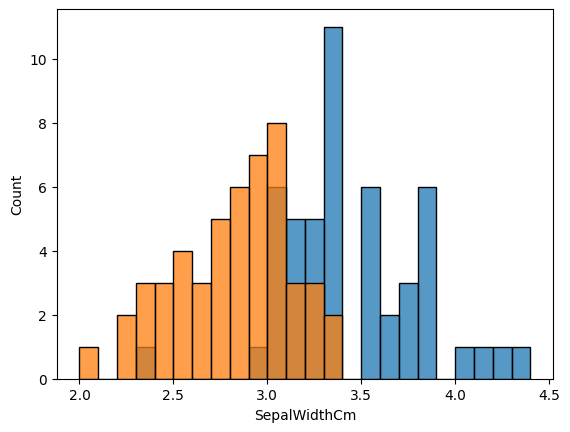

In [31]:
sns.histplot(Iris_setosa_df['SepalWidthCm'],binwidth = 0.1)
sns.histplot(Iris_versicolor_df['SepalWidthCm'],binwidth = 0.1)
plt.show()

#### 建立假设

$H_0$:Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值不存在显著差异

$H_1$:Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值存在显著差异

#### 确定检验是单尾还是双尾

因为只检验是否存在差异，并不在乎谁更长，所以确定是双尾检验。

#### 确定显著水平

双尾一般显著水平为0.05，因此我们也设定为0.05

#### 计算t值和p值



In [32]:
t_stat, p_value = ttest_ind(Iris_setosa_df['SepalWidthCm'],Iris_versicolor_df['SepalWidthCm'])
print(f"t值为:{t_stat}")
print(f"p值为:{p_value}")

t值为:9.282772555558111
p值为:4.362239016010214e-15


#### 结论

因为p值远小于显著水平0.05，因此拒绝原假设$H_0$，说明Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值存在显著差异

### 分析花瓣长度
PetalLengthCm

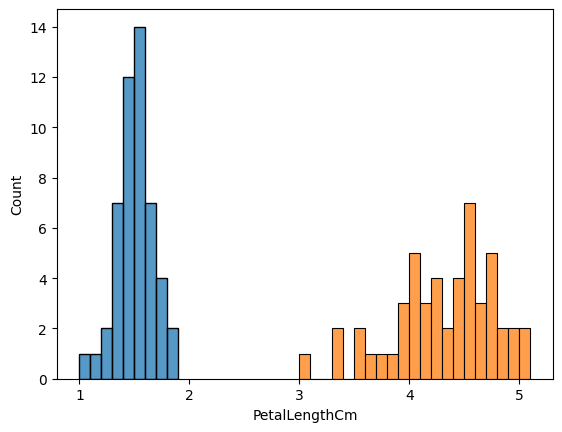

In [33]:
sns.histplot(Iris_setosa_df['PetalLengthCm'],binwidth = 0.1)
sns.histplot(Iris_versicolor_df['PetalLengthCm'],binwidth = 0.1)
plt.show()

#### 建立假设

$H_0$:Setosa鸢尾花和Versicolor鸢尾花花瓣长度的平均值不存在显著差异

$H_1$:Setosa鸢尾花和Versicolor鸢尾花花瓣长度的平均值存在显著差异

#### 确定检验是单尾还是双尾

因为只检验是否存在差异，并不在乎谁更长，所以确定是双尾检验。

#### 确定显著水平

双尾一般显著水平为0.05，因此我们也设定为0.05

#### 计算t值和p值



In [34]:
t_stat, p_value = ttest_ind(Iris_setosa_df['PetalLengthCm'],Iris_versicolor_df['PetalLengthCm'])
print(f"t值为:{t_stat}")
print(f"p值为:{p_value}")

t值为:-39.46866259397272
p值为:5.717463758170621e-62


#### 结论

因为p值远小于显著水平0.05，因此拒绝原假设$H_0$，说明Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值存在显著差异

### 分析花瓣宽度
PetalWidthCm

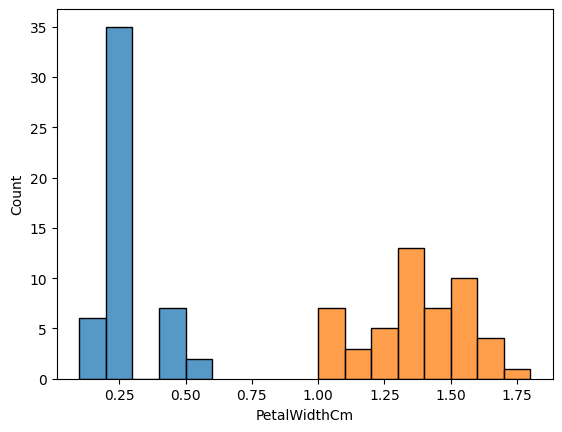

In [35]:
sns.histplot(Iris_setosa_df['PetalWidthCm'],binwidth = 0.1)
sns.histplot(Iris_versicolor_df['PetalWidthCm'],binwidth = 0.1)
plt.show()

#### 建立假设

$H_0$:Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值不存在显著差异

$H_1$:Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值存在显著差异

#### 确定检验是单尾还是双尾

因为只检验是否存在差异，并不在乎谁更长，所以确定是双尾检验。

#### 确定显著水平

双尾一般显著水平为0.05，因此我们也设定为0.05

#### 计算t值和p值



In [37]:
t_stat, p_value = ttest_ind(Iris_setosa_df['PetalWidthCm'],Iris_versicolor_df['PetalWidthCm'])
print(f"t值为:{t_stat}")
print(f"p值为:{p_value}")

t值为:-34.01237858829048
p值为:4.589080615710866e-56


#### 结论

因为p值远小于显著水平0.05，因此拒绝原假设$H_0$，说明Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值存在显著差异

## 结论

通过推论统计学的计算过程，我们发现，Setosa鸢尾花和Versicolor鸢尾花萼片、花瓣的长度和宽度平均值，均存在具有统计显著性的差异。